## Cau 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\DS102\Thực hành\lab_1\data_preprocessing.csv")
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,8,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,8,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,2,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,2,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,3,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,7,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [3]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [4]:
df_cor = df.copy()

In [5]:
for col in df.columns:
    if df_cor[col].dtype == 'int64' or col == 'area':
        df_cor = df_cor.drop(columns=[f'{col}'])

df_cor.head(10)

,FFMC,DMC,DC,ISI,temp,wind,rain
0,86.2,26.2,94.3,5.1,8.2,6.7,0.0
1,90.6,35.4,669.1,6.7,18.0,0.9,0.0
2,90.6,43.7,686.9,6.7,14.6,1.3,0.0
3,91.7,33.3,77.5,9.0,8.3,4.0,0.2
4,89.3,51.3,102.2,9.6,11.4,1.8,0.0
5,92.3,85.3,488.0,14.7,22.2,5.4,0.0
6,92.3,88.9,495.6,8.5,24.1,3.1,0.0
7,91.5,145.4,608.2,10.7,8.0,2.2,0.0
8,91.0,129.5,692.6,7.0,13.1,5.4,0.0
9,92.5,88.0,698.6,7.1,22.8,4.0,0.0


In [6]:
cor_data = df_cor.corr()
cor_data

,FFMC,DMC,DC,ISI,temp,wind,rain
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.028485,0.056702
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,-0.105342,0.074790
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.203466,0.035861
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,0.106826,0.067668
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.227116,0.069491
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,1.000000,0.061119
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.061119,1.000000


Text(0.5, 1.0, 'Heatmap of data')

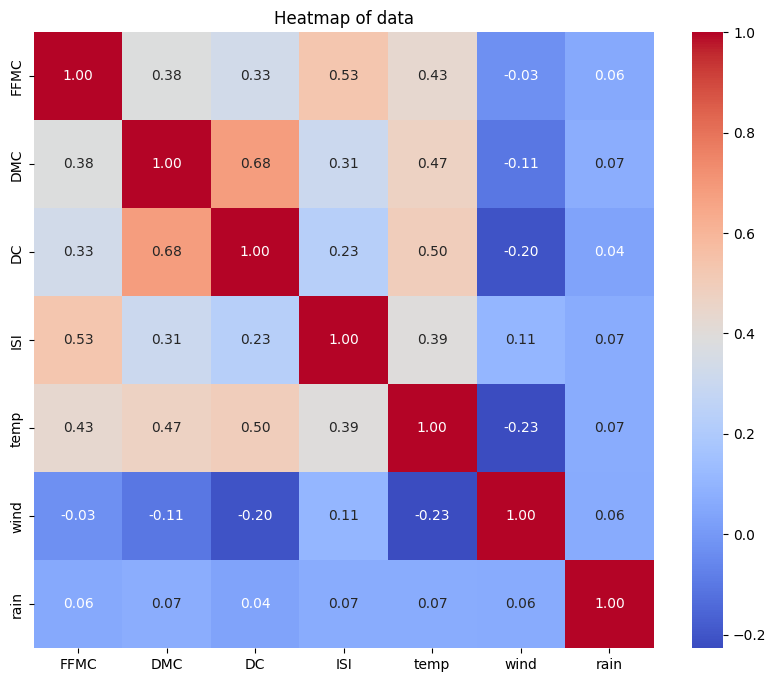

In [7]:
plt.figure(figsize = (10,8))
sns.heatmap(cor_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of data")

### Ta thay theo nhu heating map o tren thi DC va DMC co muc do tuong quan cao nhat (=0.68) nen ta se phai loai bo 1 trong 2 bien. Chon loai bo DC

### Model

In [8]:
class LinearRegression:
    def rmse(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        delta = y - y_hat
        return np.square(delta).mean()**0.5
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        cov = np.matmul(X.T, X)
        inv_cov = np.linalg.inv(cov)
        self.theta_ = inv_cov @ (X.T @ y)  # Chỉ tính inv_cov bên trong, không cần tham số inv_cov

    def predict(self, X: np.ndarray) -> np.ndarray:
        y_pred = np.matmul(self.theta_.T, X.T)
        return y_pred

In [11]:
X_y = df.drop(columns= ['DC']).to_numpy()

In [12]:
N = df.shape[0]
X_y_train, X_y_test = np.split(X_y, indices_or_sections= [int(0.8*N)])

In [13]:
X_y_train

array([[ 7.  ,  5.  ,  3.  , ...,  6.7 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  0.9 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  1.3 ,  0.  ,  0.  ],
       ...,
       [ 6.  ,  3.  ,  2.  , ...,  2.7 ,  0.  ,  0.  ],
       [ 7.  ,  4.  ,  2.  , ...,  9.4 ,  0.  ,  4.62],
       [ 9.  ,  4.  ,  7.  , ...,  4.5 ,  0.  ,  1.63]])

In [14]:
X_y_test

array([[  7.  ,   5.  ,   8.  , ...,   3.6 ,   0.  ,   0.  ],
       [  5.  ,   4.  ,   8.  , ...,   4.  ,   0.  ,   0.  ],
       [  8.  ,   6.  ,   8.  , ...,   4.9 ,   0.  , 746.28],
       ...,
       [  7.  ,   4.  ,   8.  , ...,   6.7 ,   0.  ,  11.16],
       [  1.  ,   4.  ,   8.  , ...,   4.  ,   0.  ,   0.  ],
       [  6.  ,   3.  ,  11.  , ...,   4.5 ,   0.  ,   0.  ]])

In [18]:
X_train = X_y_train[:,:11]
y_train = X_y_train[:,11:]

X_test = X_y_test[:,:11]
y_test = X_y_test[:,11:]

In [19]:
lr = LinearRegression()
lr.fit( X_test, y_test)

In [20]:
y_pred = lr.predict(X_test)
y_pred

array([[ 38.55918423,  15.79693617,  61.50367033,  34.64283003,
         31.54096172,  13.90341619,   7.82097434,  64.91139673,
         32.32082869,  54.93781155, -10.57883045,  47.39240282,
        -10.77204172,  29.10769376,  20.27663137,  20.5093141 ,
          7.98381938,  32.66430173,  -3.532144  ,  64.31402156,
         -3.74913051,   2.80566999, -12.42013623,  47.15305045,
          9.97557831,   4.8058391 , -23.61532947,   9.27020736,
         50.15691081,   8.94665008,  -7.81004142,  -3.93436417,
         -7.72306551,  -2.96642741,  17.18027768,  12.51595647,
         20.67325758,  29.53076901, -27.12599033,  33.49104726,
         10.15024335,  -1.08266805,   0.44498301, -10.16820848,
          1.75752103,  32.84935912,  39.30502768,  -0.29508015,
         32.84935912,  -0.14049159,  18.27334711,  12.29801923,
        -54.22059926,  30.30464987,   4.6043606 ,  13.48061866,
         34.64226194,  15.78186387,   3.77109912,  23.88254128,
         29.22064034,  12.88485033,  41.

In [21]:
lr.rmse(y_test, y_pred)

82.65669980004556

### Visualization

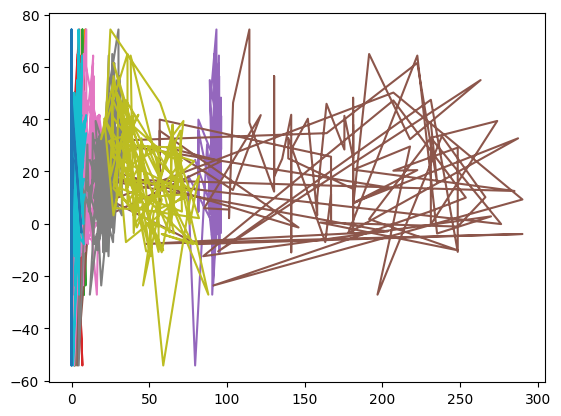

In [22]:
plt.plot(X_test, y_pred.T)